In [ ]:
import math

In [ ]:
import pandas_datareader as web

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,LSTM

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
df = web.DataReader("AAPL.US", data_source="stooq", start='2012-01-01', end='2019-12-17')

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-17,68.4731,69.0125,68.2837,68.6765,1.166743e+08
2019-12-16,67.8401,68.7722,67.8361,68.5449,1.309864e+08
2019-12-13,66.4862,67.4273,66.3556,67.3914,1.365054e+08
2019-12-12,65.5859,66.7544,65.4723,66.4862,1.406056e+08
2019-12-11,65.8372,66.3975,65.7604,66.3177,8.053014e+07
...,...,...,...,...,...
2012-01-09,12.9525,13.0213,12.8289,12.8408,4.620092e+08
2012-01-06,12.7800,12.8717,12.7630,12.8608,3.734286e+08
2012-01-05,12.6314,12.7422,12.5627,12.7272,3.178972e+08


In [ ]:
df.shape

(2003, 5)

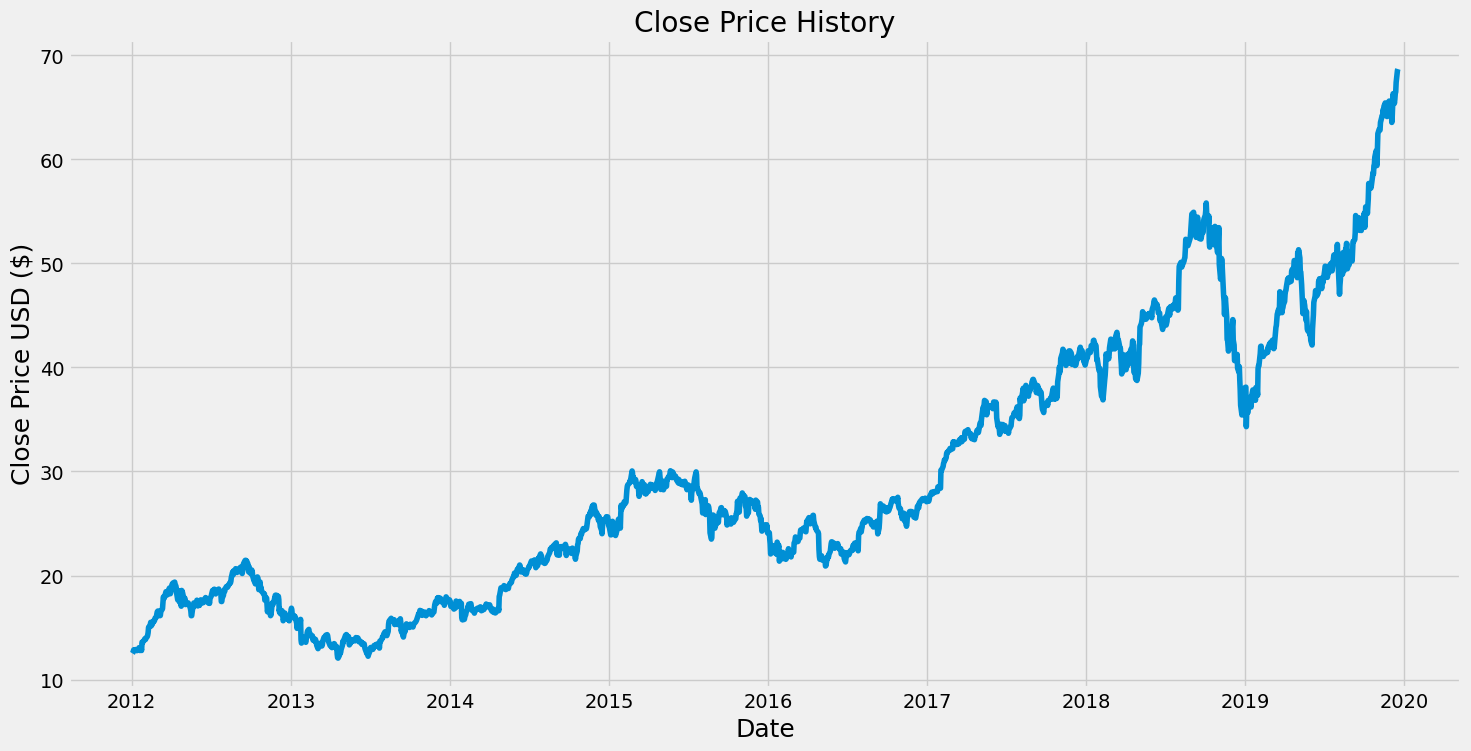

In [ ]:
#visulaise the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#create new dataframe with only the "close coloumn"
data=df.filter(['Close'])

#convert the dataframe into numpy array
dataset=data.values

#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)

training_data_len

1603

In [ ]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [0.99767542],
       [0.97729999],
       ...,
       [0.01171124],
       [0.00922768],
       [0.00804772]])

In [ ]:
#create the training data set
#created the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
       print(x_train)
       print(y_train)
       print()


[array([1.        , 0.99767542, 0.97729999, 0.96131053, 0.95833414,
       0.94840167, 0.94163989, 0.95806918, 0.9358461 , 0.91927549,
       0.90937835, 0.92971845, 0.9431007 , 0.94565492, 0.93028017,
       0.93926232, 0.91939737, 0.92038479, 0.92556211, 0.93892847,
       0.94245067, 0.93658445, 0.92316687, 0.93107328, 0.92017282,
       0.9212309 , 0.91230174, 0.90929003, 0.89643417, 0.89593957,
       0.89756113, 0.89030652, 0.85987497, 0.83617341, 0.83631119,
       0.86110792, 0.85048832, 0.83757947, 0.83582013, 0.82194329,
       0.82423254, 0.80660387, 0.80172683, 0.79785312, 0.80190171,
       0.80424572, 0.80572243, 0.77936067, 0.7661003 , 0.754813  ,
       0.76622395, 0.76599608, 0.73943825, 0.73130221, 0.75563968,
       0.75292825, 0.73074049, 0.7353349 , 0.74033735, 0.72587759])]
[0.7302812286375929]



In [ ]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [ ]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compiler the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)


1543/1543 [==============================] - 55s 33ms/step - loss: 0.0016


In [ ]:
#create the testing data set
#create a new array containing scalred calues from index 1543 ro 2003
test_data=scaled_data[training_data_len-60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
#convert the data to numpy array
x_test=np.array(x_test)


In [ ]:
#reshape the data 
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


13/13 [==============================] - 2s 36ms/step


In [ ]:
#get the root mean squared error(RMSE) 
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.3908572469329834

<ipython-input-44-d20a623a7fcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


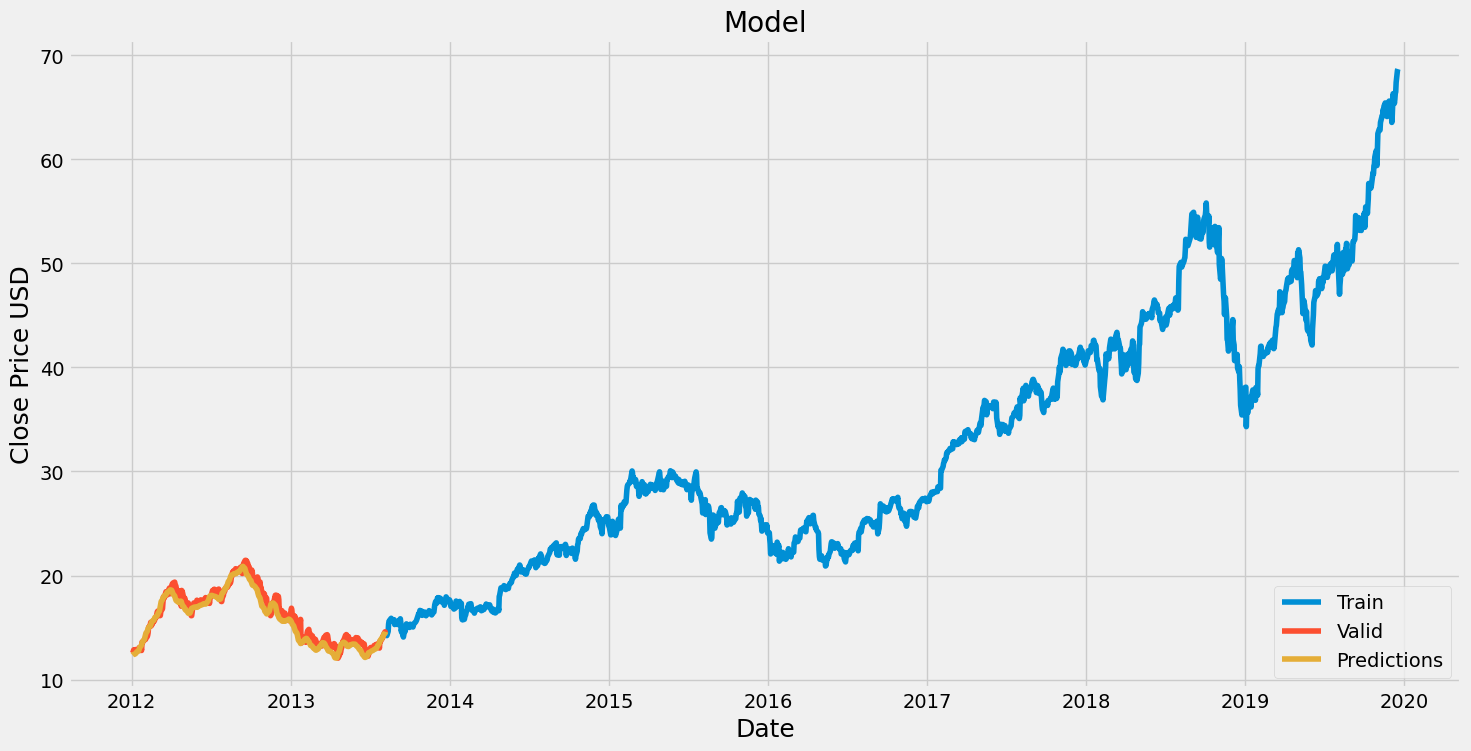

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2013-08-06,14.4679,14.597268
2013-08-05,14.5995,14.450697
2013-08-02,14.3841,14.340754
2013-08-01,14.2026,14.243660
2013-07-31,14.0721,14.146755
...,...,...
2012-01-09,12.8408,12.454047
2012-01-06,12.8608,12.427126
2012-01-05,12.7272,12.408283


In [ ]:
# Get the stock quote
apple_quote = web.DataReader("AAPL.US", data_source="stooq", start='2012-01-01', end='2019-12-17')
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be vlaues between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test=np.array(X_test)
#reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 30ms/step
[[12.301924]]


In [ ]:
#get the quote
apple_quote2 = web.DataReader("AAPL.US", data_source="stooq", start='2019-12-20', end='2019-12-23')
print(apple_quote2['Close'])


Date
2019-12-23    69.5588
2019-12-20    68.4423
Name: Close, dtype: float64


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-17,68.4731,69.0125,68.2837,68.6765,1.166743e+08
2019-12-16,67.8401,68.7722,67.8361,68.5449,1.309864e+08
2019-12-13,66.4862,67.4273,66.3556,67.3914,1.365054e+08
2019-12-12,65.5859,66.7544,65.4723,66.4862,1.406056e+08
2019-12-11,65.8372,66.3975,65.7604,66.3177,8.053014e+07
...,...,...,...,...,...
2012-01-09,12.9525,13.0213,12.8289,12.8408,4.620092e+08
2012-01-06,12.7800,12.8717,12.7630,12.8608,3.734286e+08
2012-01-05,12.6314,12.7422,12.5627,12.7272,3.178972e+08
